# PYTHON CODE SAMPLE PART 4 - RANDOM FOREST REGRESSION MODEL BUILDING

In this part I will be building a Random Forest regression model of EGFR inhibitors where PaDEL fingerprints will be used as predictor variables and pIC50 will be used as response variable. I will also implement 10-fold cross vaildation since performarnce of Random Forest algorithm greatly depends on the traing and test data split.

### Import libraries

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
#! wget https://raw.githubusercontent.com/Baksic-Ivan/Python_template-Computational_Drug_Discovery/main/EGFR_bioactivity_data_pIC50_fp.csv

In [5]:
df = pd.read_csv('EGFR_bioactivity_data_pIC50_fp.csv')

# since cross-validation takes folds in order, dataframe shuffle is needed
df = df.sample(frac=1)

In [6]:
predictor = df.drop('pIC50', axis=1)
response = df.pIC50

Dropping low variance features

In [7]:
predictor.shape

(9018, 881)

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
predictor = selection.fit_transform(predictor)

In [9]:
predictor.shape

(9018, 148)

In [10]:
model = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(model, predictor, response, cv=10, scoring='r2')
final_score = sum(scores)/len(scores)
final_score

0.36720857308987115

In [11]:
predictions = cross_val_predict(model, predictor, response, cv=10)
predictions

array([5.27758614, 7.49075431, 8.82584917, ..., 6.27363492, 5.65017418,
       8.27788373])

<function matplotlib.pyplot.show(close=None, block=None)>

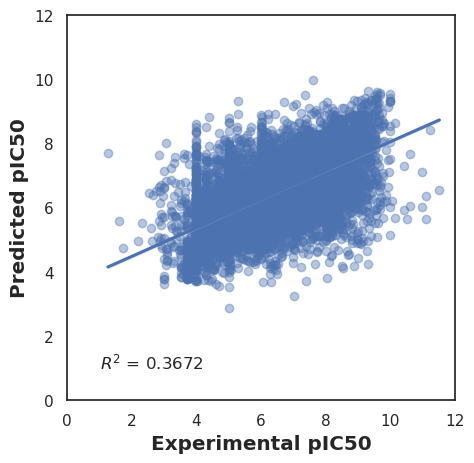

In [24]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = response, y = predictions, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.text(1, 1, '$R^2$ = '+str(round(final_score, 4)))
ax.figure.set_size_inches(5, 5)
plt.show
